In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [102]:
df = pd.read_csv("../input/drug-classification/drug200.csv")

In [103]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [104]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [105]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [106]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* float64(1): Na_to_K
* int64(1): Age
* object(4): Sex, BP, Cholesterol, Drug

In [108]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


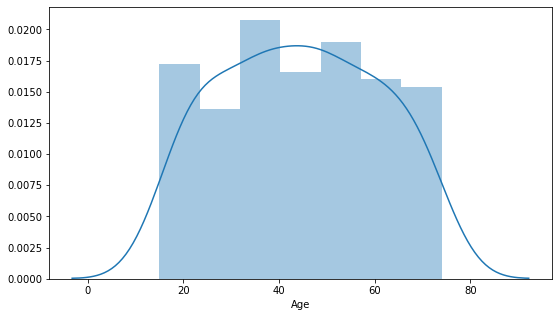

In [109]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

In [110]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

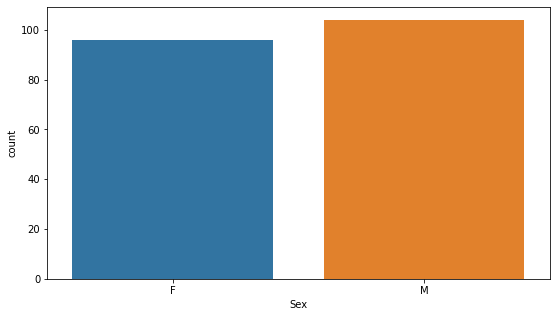

In [111]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

In [112]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

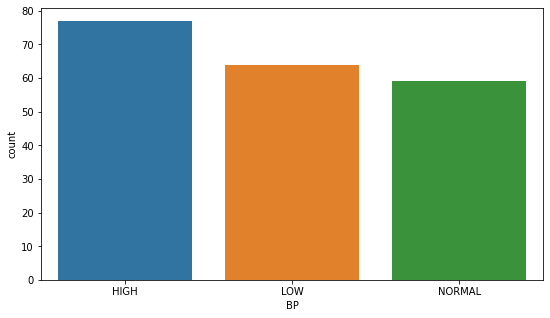

In [113]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

<a id='7'></a>
### Cholesterol Variable

In [114]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

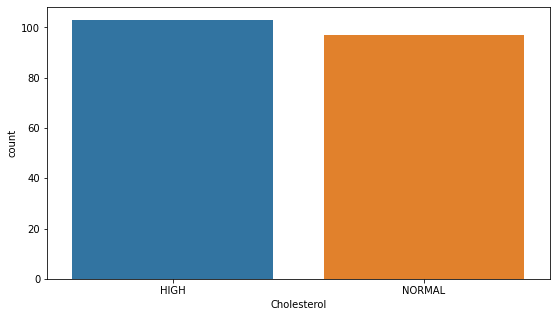

In [115]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

In [116]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


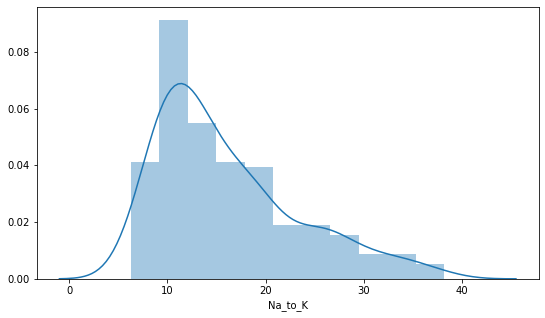

In [117]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

<a id='9'></a>
### Drug Variable

In [118]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

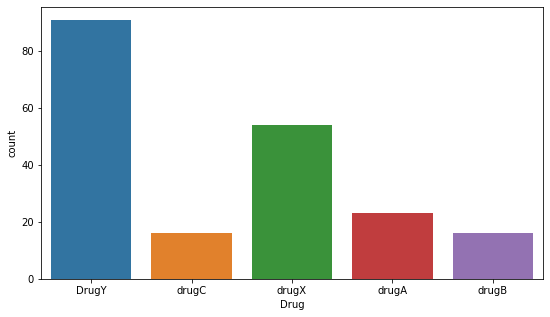

In [119]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

* Drug is target column and you can see that it is unbalanced dataset. Using K Fold cross-validation would be better for reliable results.

<a id='10'></a>
# Basic Data Analysis

* Age -- Drug
* Sex -- Drug
* BP -- Drug
* Cholesterol -- Drug

<a id='11'></a>
## Age -- Drug

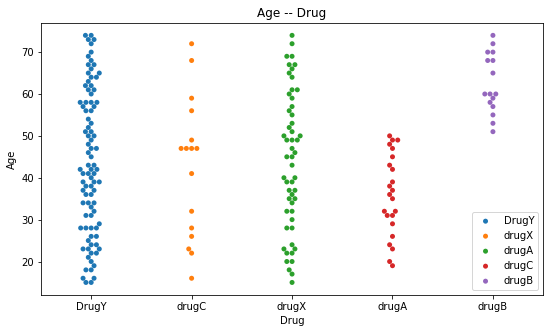

In [120]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [121]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


* DrugB is taken only by older than 51 years old. 
* DrugA is taken only by younger than 50 years old. 

<a id='12'></a>
## Sex -- Drug

In [122]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


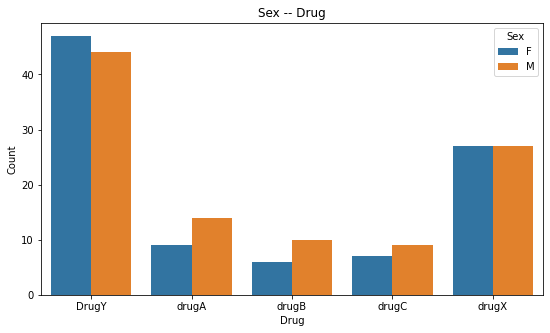

In [123]:

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

<a id='13'></a>
## BP -- Drug

In [124]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


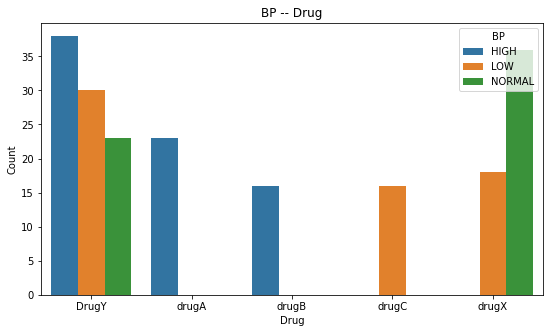

In [125]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

* drugA and drugB are got only by people who have HIGH blood pressure.
* drugC is got by people who have LOW blood pressure.
* drugX is got by people who have HIGH blood pressure.
* BP is an important feature for classification.

<a id='14'></a>
## Na_to_K -- Drug

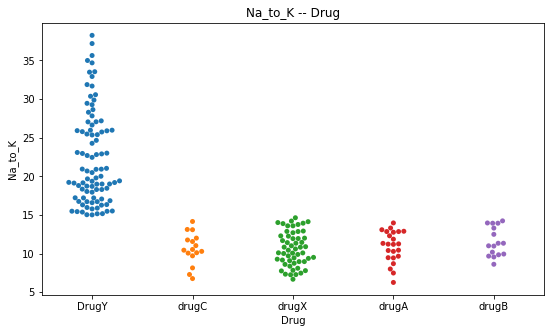

In [126]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [127]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


* People who have Na_to_K ratio is bigger than 15, get DrugY.
* We can create a new feature from here.

<a id='15'></a>
## Cholesterol -- Drug

In [128]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


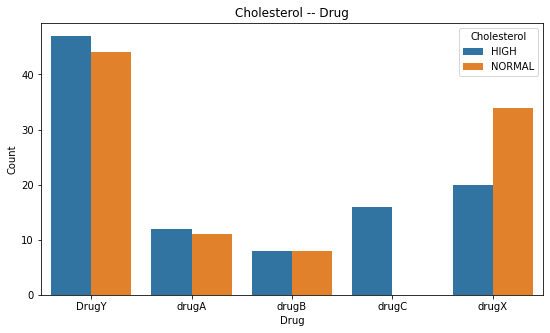

In [129]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

* drugC is got by people who have HIGH cholesterol.
* Cholesterol is an important feature to classify drugC

<a id='16'></a>
## Na_to_K -- BP -- Drug

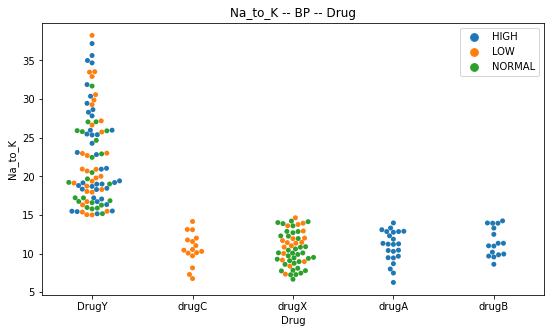

In [130]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they get drugC only.

<a id='17'></a>
# Preparing Data and Feature Engineering

<a id='18'></a>
## Create New Features

<a id='19'></a>
### Na_to_K_Bigger_Than_15 

If Na_to_K is bigger than 15, it is always drugY.

In [131]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [132]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


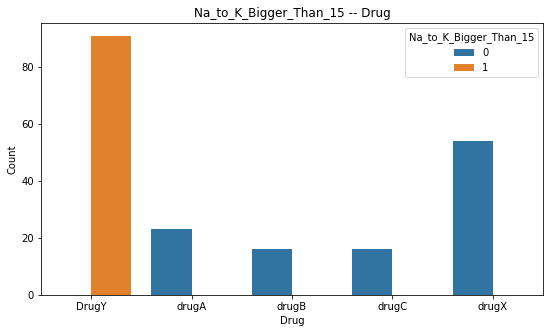

In [133]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

* Na_to_K_Bigger_Than_15 feature will be important feature to drugY classification.

<a id='20'></a>
## Label Encoding

We will convert from object to int64

* Sex
* BP
* Cholesterol
* Na_to_K
* Na_to_K_Bigger_Than_15

In [134]:
from sklearn.preprocessing import LabelEncoder


In [100]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])
    return le

In [85]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [135]:
le_dict = {}

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])
    le_dict[y] = le

label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [136]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


<a id='21'></a>
## Train Test Split

In [137]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


In [138]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.98125
Test Score: 0.975


In [139]:
y_pred = rfc.predict(x_test)
y_pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 4, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [140]:
y_test

array([[4],
       [0],
       [4],
       [3],
       [0],
       [0],
       [0],
       [4],
       [1],
       [4],
       [1],
       [4],
       [0],
       [1],
       [2],
       [0],
       [2],
       [4],
       [3],
       [0],
       [2],
       [4],
       [4],
       [0],
       [0],
       [0],
       [3],
       [4],
       [0],
       [4],
       [0],
       [3],
       [3],
       [0],
       [1],
       [0],
       [4],
       [1],
       [0],
       [1]])

In [141]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
95,36,1,1,1,67,0
15,16,0,0,1,116,1
30,18,0,2,1,19,0
158,59,0,1,0,49,0
128,47,1,1,1,192,1
115,51,1,0,0,134,1
69,18,0,0,1,165,1
170,28,0,2,0,85,0
174,42,1,0,1,81,0
45,66,0,2,1,13,0


In [142]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  1]
 [ 0  0  0  0 11]]
Random Forest accuracy is: 97.50%


In [143]:
x_test = x_test.reset_index(drop=True)

In [144]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
0,36,1,1,1,67,0
1,16,0,0,1,116,1
2,18,0,2,1,19,0
3,59,0,1,0,49,0
4,47,1,1,1,192,1
5,51,1,0,0,134,1
6,18,0,0,1,165,1
7,28,0,2,0,85,0
8,42,1,0,1,81,0
9,66,0,2,1,13,0


In [145]:
y_pred = rfc.predict(x_test)

# create a new DataFrame with the prediction results
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])
y_test_df = pd.DataFrame(y_test, columns=['actual'])
# concatenate x_test with y_pred_df
result_df = pd.concat([x_test, y_pred_df, y_test_df], axis=1)

# save the resulting DataFrame to a CSV file
result_df.to_csv('result.csv', index=False)

In [146]:
result_df

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15,prediction,actual
0,36,1,1,1,67,0,4,4
1,16,0,0,1,116,1,0,0
2,18,0,2,1,19,0,4,4
3,59,0,1,0,49,0,3,3
4,47,1,1,1,192,1,0,0
5,51,1,0,0,134,1,0,0
6,18,0,0,1,165,1,0,0
7,28,0,2,0,85,0,4,4
8,42,1,0,1,81,0,1,1
9,66,0,2,1,13,0,4,4


In [148]:
result_df['Sex'] = le_dict['Sex'].inverse_transform(result_df['Sex'])
result_df['BP'] = le_dict['BP'].inverse_transform(result_df['BP'])
result_df['Cholesterol'] = le_dict['Cholesterol'].inverse_transform(result_df['Cholesterol'])

In [149]:
result_df['prediction'] = le_dict['Drug'].inverse_transform(result_df['prediction'])
result_df['actual'] = le_dict['Drug'].inverse_transform(result_df['actual'])

In [150]:
result_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15,prediction,actual
0,36,M,LOW,NORMAL,67,0,drugX,drugX
1,16,F,HIGH,NORMAL,116,1,DrugY,DrugY
2,18,F,NORMAL,NORMAL,19,0,drugX,drugX
3,59,F,LOW,HIGH,49,0,drugC,drugC
4,47,M,LOW,NORMAL,192,1,DrugY,DrugY


In [151]:
# save the resulting DataFrame to a CSV file
result_df.to_csv('result.csv', index=False)